# Data Exploration and Visualisation — Netflix

## Import Libraries and Data Loading

In [57]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [58]:
# loading the dataset
df = pd.read_csv('/netflix.csv')

##Basic Metrics

In [59]:
# Display first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [60]:
# Display first few rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
#Extracting the Total Number of columns in the data frame
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [63]:
# Checking the shape of the dataset
df.shape

(8807, 12)

In [64]:
# Checking basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Insights: From the above analysis, it is clear that, The dataset consists of 8,807 entries with 12 attributes and also we can see missing data in 5 of the total columns


##Analyzing Basic Metrics

###Statistical Summary

In [65]:
# Summary Statistics in DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [66]:
# Summary Statistics in DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [67]:
# Statistical summary of non-numeric columns in DataFrame
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Insights: ->Type of content - Among the 8807 items available on Netflix, 6131 of them are movies, accounting for nearly 70% of the total content. The remaining 30% consists of TV series.

->Director - Rajiv Chilaka holds the top position on the director list, with 19 credits to his name. He specializes in creating animated movies for children.

->Cast - David Attenborough leads the actor list with 19 appearances in various films and shows on Netflix.

->Country - The USA ranks at the top as the country with the highest production contribution to Netflix, accounting for 35% of the total content.

->Date Added - January 1, 2020, stands out as the peak date for content uploads on Netflix. On that day alone, approximately 109 different shows and movies were added to the platform.

->Ratings - There are 17 different types of ratings present on Netflix. The "TV-MA" (Mature Audience Only) rating dominates the charts, covering almost 36% of the total shows and movies on the platform with this rating.

##Data Cleaning, Data Analysis


###Duplicate Detection

In [68]:
# Checking duplicate entries in the dataset
df.duplicated().value_counts()

,count
False,8807


###Insights: There are no duplicate entries in the dataset

Un-nesting the columns

In [69]:
# 1. Un-nesting the 'cast' column
cast_df = df[['title', 'cast']].copy()
cast_df['unnested_cast'] = cast_df['cast'].apply(lambda x: str(x).split(', '))
cast_df = cast_df.explode('unnested_cast').reset_index(drop=True)
# 2. Un-nesting the 'director' column
director_df = df[['title', 'director']].copy()
director_df['unnested_director'] = director_df['director'].apply(lambda x: str(x).split(', '))
director_df = director_df.explode('unnested_director').reset_index(drop=True)
# 3. Un-nesting the 'country' column
country_df = df[['title', 'country']].copy()
country_df['unnested_country'] = country_df['country'].apply(lambda x: str(x).split(', '))
country_df = country_df.explode('unnested_country').reset_index(drop=True)
# 4. Merging the DataFrames based on 'title' column
# First, merge the cast and director data
merged_df = pd.merge(cast_df, director_df, on='title', how='left')
# Then, merge with the country data
merged_df = pd.merge(merged_df, country_df, on='title', how='left')
merged_df.head()

,title,cast,unnested_cast,director,unnested_director,country,unnested_country
0,Dick Johnson Is Dead,NaN,nan,Kirsten Johnson,Kirsten Johnson,United States,United States
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,NaN,nan,South Africa,South Africa
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,NaN,nan,South Africa,South Africa
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane,NaN,nan,South Africa,South Africa
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba,NaN,nan,South Africa,South Africa


Column Validation

In [70]:
# View the unique values for each specified column
df[['type', 'release_year', 'rating', 'duration']].apply(lambda x: x.unique())

,0
type,"[Movie, TV Show]"
release_year,"[2020, 2021, 1993, 2018, 1996, 1998, 1997, 201..."
rating,"[PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ..."
duration,"[90 min, 2 Seasons, 1 Season, 91 min, 125 min,..."


Insights: There is presense of 3 unusual values in rating column. We need to replace them by NaN

In [71]:
# Unusual values in the 'rating' column to replace with NaN
unusual_values = ['74 min', '84 min', '66 min']
# Replace those values with NaN

df['rating'] = df['rating'].replace(unusual_values, np.nan)
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


Missing Value Analysis

In [72]:
#Identifying Missing Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,7
duration,3


In [73]:
#percentage of missing values for each column
df.isnull().sum()/len(df)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.079482
duration,0.034064


Insights: From above analysis, there are total of 6 columns containing missing values. Director's column has the most missing values followed by cast and country column. Date added, ratings and duration have less than 1.

In [74]:
# Ensure all values in 'duration' are strings
df['duration'] = df['duration'].astype(str)
# Extract numeric part of 'duration' and convert to float
df['cleaned_duration'] = df['duration'].str.extract('(\d+)').astype(float)
df['cleaned_duration'] = pd.to_numeric(df['cleaned_duration'], errors='coerce')
df = df.dropna(subset=['cleaned_duration'])
# Fill missing values in 'duration' with the median of 'cleaned_duration'
df.loc[:, 'duration'] = df['cleaned_duration'].fillna(df['cleaned_duration'].median())

Replacing the missing values

In [75]:
# Handling missing values
df.loc[:, 'cast'] = df['cast'].fillna('Unknown Actor')
df.loc[:, 'director'] = df['director'].fillna('Unknown Director')
df.loc[:, 'country'] = df['country'].fillna('Unknown Country')
df.loc[:, 'rating'] = df['rating'].fillna('Unknown Rating')

Adding new columns for better analysis

In [76]:
#Handling Missing Values:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Fill missing values in 'date_added' with a specific date
df['date_added'] = df['date_added'].fillna(pd.to_datetime('2000-01-01'))
# Confirm 'date_added' is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
# Adding additional columns after handling missing values
df.loc[:, 'year_added'] = df['date_added'].dt.year
df.loc[:, 'month_added'] = df['date_added'].dt.month_name()
df.loc[:, 'week_added'] = df['date_added'].dt.isocalendar().week
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cleaned_duration,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",90.0,2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2021,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021,September,38
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021,September,38
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021,September,38


In [77]:
df['duration'] = df['duration'].fillna(0).astype(int)
df['release_year'] = df['release_year'].fillna(0).astype(int)
# Check for any remaining missing values
df.isnull().sum()

/tmp/ipython-input-77-2433031702.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['duration'] = df['duration'].fillna(0).astype(int)


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [78]:
#checking shape of new df
df.shape

(8804, 16)


## Non-Graphical Analysis (Value Counts)

In [79]:
type_counts = df['type'].value_counts()
rating_counts = df['rating'].value_counts()
country_counts = df['country'].value_counts()
# Display counts
print(type_counts)
print('_'*20)
print(rating_counts)
print('_'*20)
print(country_counts)

type
Movie      6128
TV Show    2676
Name: count, dtype: int64
____________________
rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown Rating       4
NC-17                3
UR                   3
Name: count, dtype: int64
____________________
country
United States                                             2815
India                                                      972
Unknown Country                                            831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbi

In [80]:
# Finding unique values for specified columns and their counts
type_counts = df['type'].value_counts().head(10)
country_counts = df['country'].value_counts().head(10)
rating_counts = df['rating'].value_counts().head(10)
release_year_counts = df['release_year'].value_counts().head(10)
# Displaying the counts
print("Unique Content Types:", type_counts)
print('__'*20)
print("Unique Countries:", country_counts)
print('__'*20)
print("Unique Ratings:", rating_counts)
print('__'*20)
print("Unique Release Years:", release_year_counts)

Unique Content Types: type
Movie      6128
TV Show    2676
Name: count, dtype: int64
________________________________________
Unique Countries: country
United States      2815
India               972
Unknown Country     831
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64
________________________________________
Unique Ratings: rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64
________________________________________
Unique Release Years: release_year
2018    1147
2017    1031
2019    1030
2020     953
2016     902
2021     592
2015     559
2014     352
2013     288
2012     237
Name: count, dtype: int64


## Data Visualization

Visual Analysis - Univariate, Bivariate after pre-processing of the data

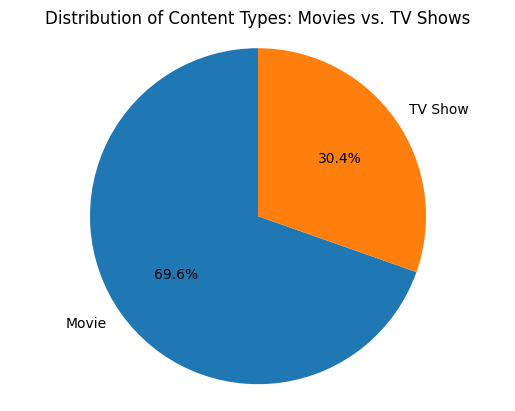

In [81]:
#Univariate Example with Pie Chart for 'Type' (Movie/TV Show)
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types: Movies vs. TV Shows')
plt.axis('equal')
plt.show()

🔍Insights: Analysis done based on one variable. The count of Movies is significantly higher than that of TV Shows, indicating that Netflix has a more extensive catalog of movies. Majority: Movies make up the majority of the content, representing 69.6%. Minority: TV shows account for 30.4% of the total content

Continuous Variables: Distplot, Countplot, Histogram for Univariate Analysis



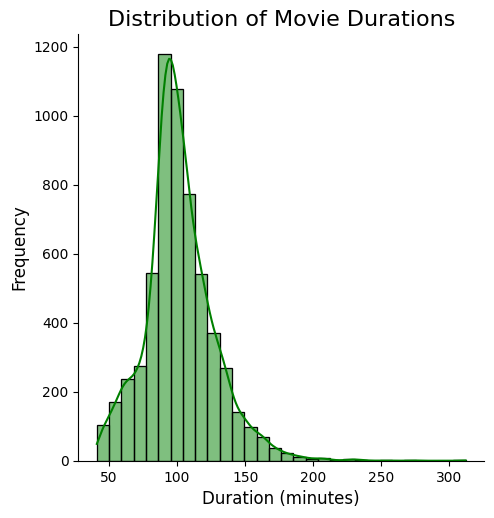

In [82]:
df_movies = df[df['cleaned_duration'] > 40]
# Plot the distribution of movie durations
sns.displot(df_movies['cleaned_duration'], kde=True, bins=30, color='green')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Insights:

->Typical Range: Most movies last between 75 and 125 minutes.

->Peak Duration: The most common movie length is around 100 minutes.

->Skewed Distribution: There are fewer movies longer than 200 minutes, indicating a skew towards shorter durations.

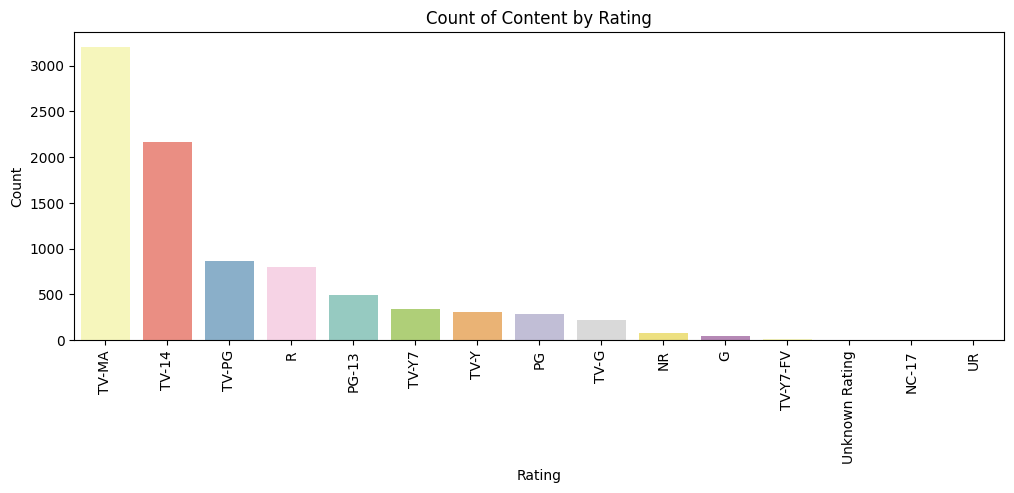

In [83]:
#Count Plot for Rating:
plt.figure(figsize=(12, 4))
sns.countplot(x='rating', data=df,hue='rating', order=df['rating'].value_counts().index, palette='Set3')
plt.title('Count of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Insights: ->The majority of the content is rated “TV-MA” followed by “TV-14”, indicating a focus on mature audiences and teenagers.

->TV-MA: Highest count

->TV-14: Second highest

->NC-17/UR: Lowest counts

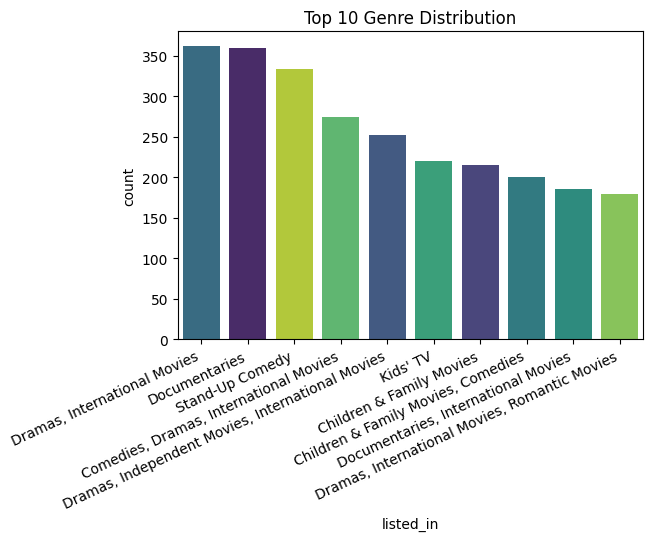

In [84]:
#Count Plot for Genre:
top_genres = df['listed_in'].value_counts().head(10).index
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['listed_in'].isin(top_genres)], x='listed_in', hue='listed_in', palette='viridis', order=top_genres)
plt.title("Top 10 Genre Distribution")
plt.xticks(rotation=25, ha='right')
plt.show()

Insights:

Most Popular: Dramas, International Movies.

Highly Popular: Documentaries, Stand-Up Comedy.

Diverse Content: Multiple genres for kids like Kids' TV and Children & Family Movies.

Common Pairings: Genres often paired, such as Dramas with Comedies and International Movies

## Bivariate Analysis


For Categorical variables: Boxplot

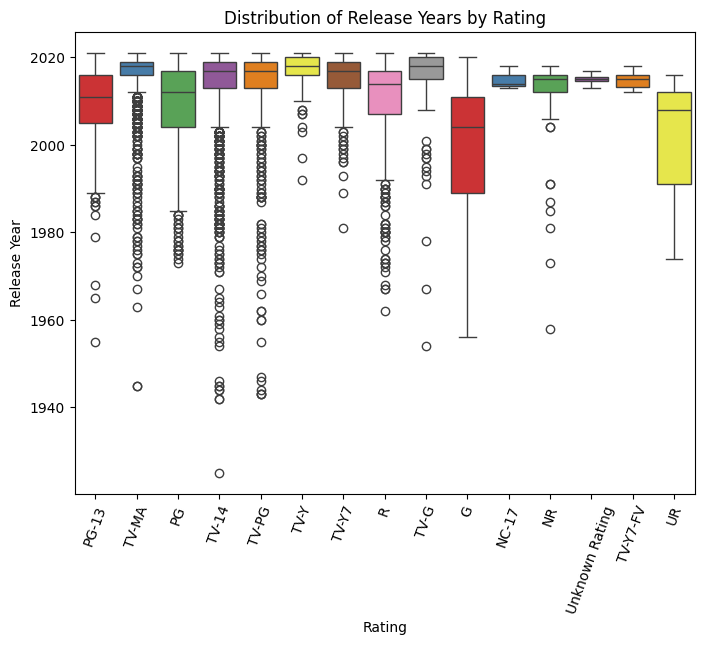

In [85]:
# Boxplot for rating vs. release_year
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='release_year', data=df, hue='rating', palette='Set1')
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=70)
plt.show()

Insights:

->Recent Ratings:TV-MA and TV-14 have more recent releases.

->Consistent Ratings: G and PG show consistent release years.

->Wide Range: R ratings have a wide range of release years.

For Correlation: Heatmaps, Pairplots

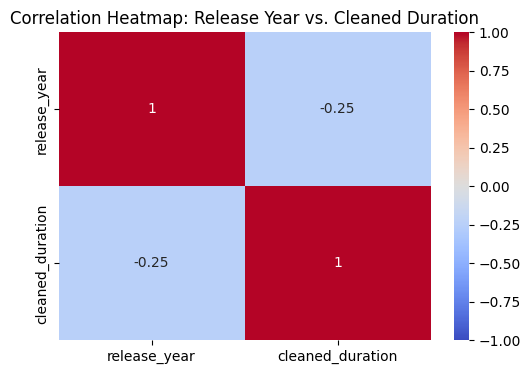

In [86]:
#visualizing correlations between numerical columns using a heatmap:
corr_matrix = df[['release_year', 'cleaned_duration']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Release Year vs. Cleaned Duration')
plt.show()


Insights: From above analysis,

->Weak Negative Correlation: Release year and duration show a slight negative correlation (-0.25), indicating newer releases tend to be slightly shorter.

->Perfect Self-Correlation: Each variable correlates perfectly with itself (1.00).

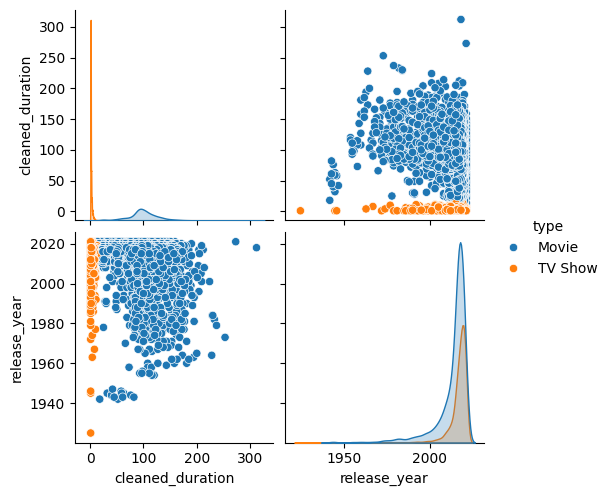

In [87]:
# Pairplot for multiple variables (duration, release_year, rating)
sns.pairplot(df, vars=['cleaned_duration', 'release_year'], hue='type')
plt.show()

Insights:

->Duration and Type: Movies have a wider range of durations, often between 80 and 120 minutes. TV shows typically have shorter durations, indicating they might be single episodes rather than full series.

->Release Year Trends:

Both movies and TV shows have seen an increase in releases over the years, especially post-2000.

The trend shows a steady growth in content production for both types.

##Trend in Movie Releases Over the Last 20-30 Years

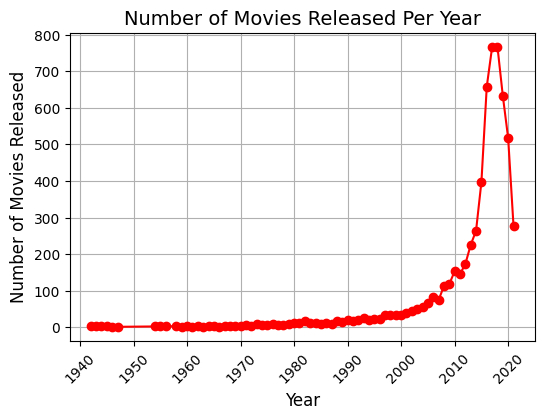

In [88]:
df_movies = df[df['type'] == 'Movie']
movies_per_year = df_movies.groupby('release_year').size()
# Plot the trend
plt.figure(figsize=(6, 4))

movies_per_year.plot(kind='line', marker='o', color='red')
plt.title('Number of Movies Released Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Insights: From above analysis,

->These points reflect major trends in movie production over the past few decades.

->Significant Increase: There was a notable rise in movie releases starting around 2000.

->Peak Period: The highest number of releases occurred in the early 2010s. Decline: After peaking, the number of movie releases has declined post-2015.


###Comparison of tv shows vs movies

Number of Movies and Tv shows Produced in Each Country

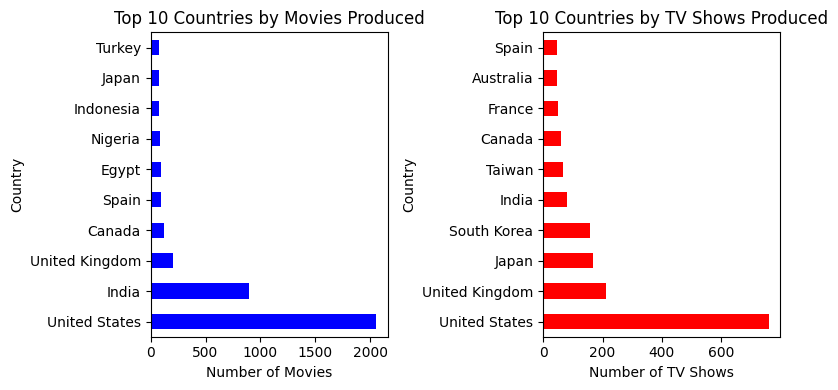

In [89]:
# Filter out "Unknown Country"
df_cleaned = df[df['country'] != 'Unknown Country']
# Number of Movies and TV Shows Produced in Each Country (Top 10)
movies_top10 = df_cleaned[df_cleaned['type'] == 'Movie'].groupby('country')['title'].nunique().nlargest(10)
tv_shows_top10 = df_cleaned[df_cleaned['type'] == 'TV Show'].groupby('country')['title'].nunique().nlargest(10)
# Create subplots for side-by-side comparison
plt.figure(figsize=(8, 4))
# Plot for movies
plt.subplot(1, 2, 1)
movies_top10.plot(kind='barh', color='blue')
plt.title('Top 10 Countries by Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
# Plot for TV shows
plt.subplot(1, 2, 2)
tv_shows_top10.plot(kind='barh', color='red')
plt.title('Top 10 Countries by TV Shows Produced')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
# Adjust layout
plt.tight_layout()
plt.show()

🔍Insights: From above , These are major contributions of different countries to global content production.

->United States Dominance: Leads in movie (2000) and TV show (700) production.

->India's Strong Presence: Second in movie production (1000), significant in TV shows.

->Global Contributions: Japan, Canada, UK contribute significantly to both movies and TV shows.

->TV Shows: South Korea and Japan are key players in TV show production.

##Best Time to launch a TV show/Movie

Best Week to launch a TV show/Movie

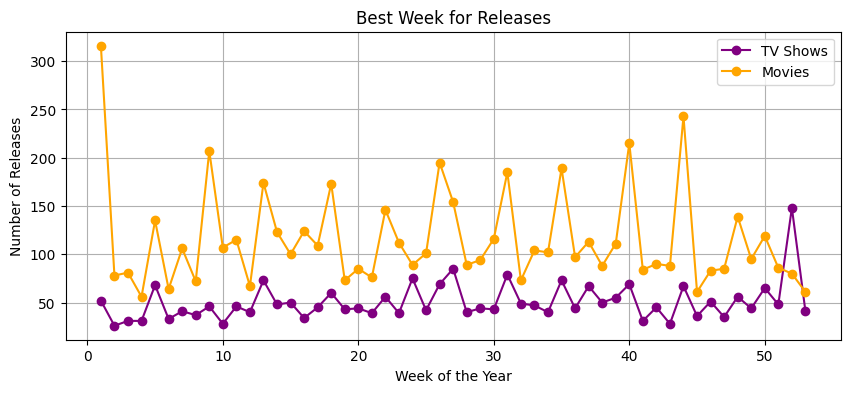

In [90]:
# Calculating the best week for TV Shows and Movies
best_week_tv = df[df['type'] == 'TV Show'].groupby('week_added')['title'].count()
best_week_movie = df[df['type'] == 'Movie'].groupby('week_added')['title'].count()
# Plotting both on the same line plot
plt.figure(figsize=(10, 4))
plt.plot(best_week_tv.index, best_week_tv.values, marker='o', label='TV Shows', color='purple')
plt.plot(best_week_movie.index, best_week_movie.values, marker='o', label='Movies', color='orange')
plt.title('Best Week for Releases')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

Insights:

->Similar Trends: Both movies and TV shows show similar weekly upload trends with spikes and dips.

->Monthly Cycle: A pattern emerges where there is a noticeable spike in content uploads during a specific week, followed by three weeks of reduced uploads, suggesting a monthly cycle.

->Peak Movie Uploads: Highest number of movies are uploaded in the first week of the year.

Peak TV Show Uploads: Highest number of TV shows uploads occurs around the 26th week of the year.

##Best Month to launch a TV show/Movie

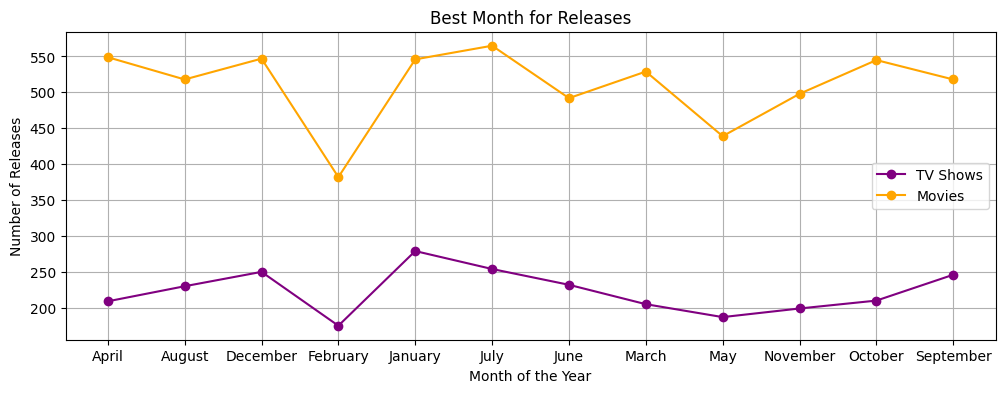

In [91]:
# Calculating the best month for TV Shows and Movies
best_month_tv = df[df['type'] == 'TV Show'].groupby('month_added')['title'].count()
best_month_movie = df[df['type'] == 'Movie'].groupby('month_added')['title'].count()
# Plotting both on the same line plot
plt.figure(figsize=(12, 4))
plt.plot(best_month_tv.index, best_month_tv.values, marker='o', label='TV Shows', color='purple')
plt.plot(best_month_movie.index, best_month_movie.values, marker='o', label='Movies', color='orange')
plt.title('Best Month for Releases')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

Insights: TV Shows:

->Best Months: April and September see the highest number of TV show releases. Least Releases: February has the fewest releases. Movies:

->Best Months: April and October have the most movie releases.

->Least Releases: February also sees the fewest movie releases. Both TV shows and movies have a peak in releases in April, while February tends to have fewer releases.

##Analysis of actors/directors of different types of shows/movies

Analysis of actors

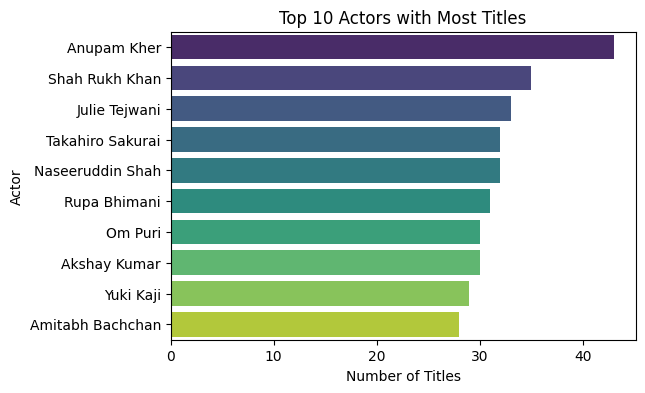

In [92]:
# Split the 'cast' column into individual actors
df_cast = df['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='actor')
df_cast = df_cast[df_cast['actor'] != 'Unknown Actor']
# Count unique titles for each actor
top_actors = df_cast.groupby('actor')['index'].nunique().reset_index(name='title_count')
top_actors = top_actors.sort_values(by='title_count', ascending=False).head(10)
# Plotting the top 10 actors
plt.figure(figsize=(6, 4))
sns.barplot(y=top_actors['actor'], x=top_actors['title_count'], hue=top_actors['actor'], palette='viridis')
plt.title('Top 10 Actors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

Insights:

->Anupam Kher and Shah Rukh Khan lead with the most titles.

->Indicates their careers in movies and TV shows.

->Actors with diverse roles across genres.

##Analysis for directors

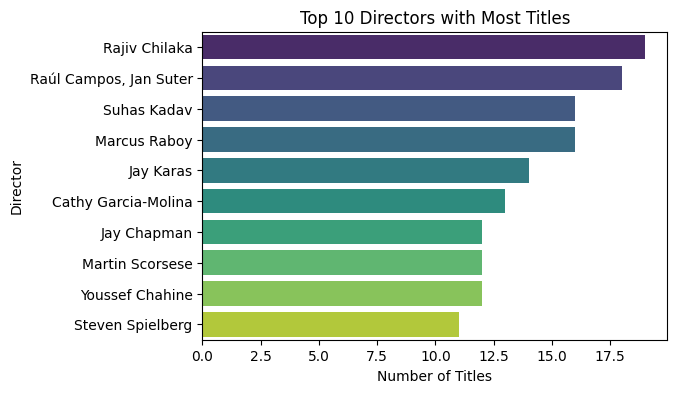

In [93]:
# Fill missing director values with 'Unknown Director'
df['director'] = df['director'].fillna('Unknown Director')
# Filter out rows with 'Unknown Director'
df_known_directors = df[df['director'] != 'Unknown Director']
# Calculating the count of titles per director
director_counts = df_known_directors['director'].value_counts().head(10)
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis', hue=director_counts.index, dodge=False, legend=False)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.legend([], [], frameon=False)
plt.show()

Insights: From above analysis, These directors have made significant contributions to the film industry, reflected by their high number of titles.

->Rajiv Chilaka: Most titles with around 18.

->Raul Campos and Jan Suter: Close with about 16 titles each.

->Notable Names: Martin Scorsese and Steven Spielberg also make the list.

##Top Movie Genres: Most Popular and Frequently Produced

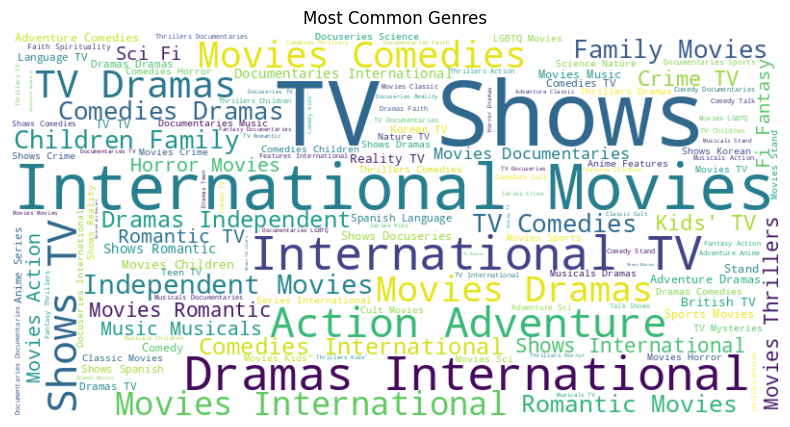

In [94]:
# Join all genres into a single string
text = ' '.join(df['listed_in'].dropna().values)
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres')
plt.show()

Insights:

->Dominant Genres: TV Shows and International Movies stand out the most.

->Popular Genres: Dramas, Comedies, and Action & Adventure.

->Family-Friendly: Significant content for Family Movies and Children & Family Movies

##Average Time Gap Between Movie Release and Addition to Netflix

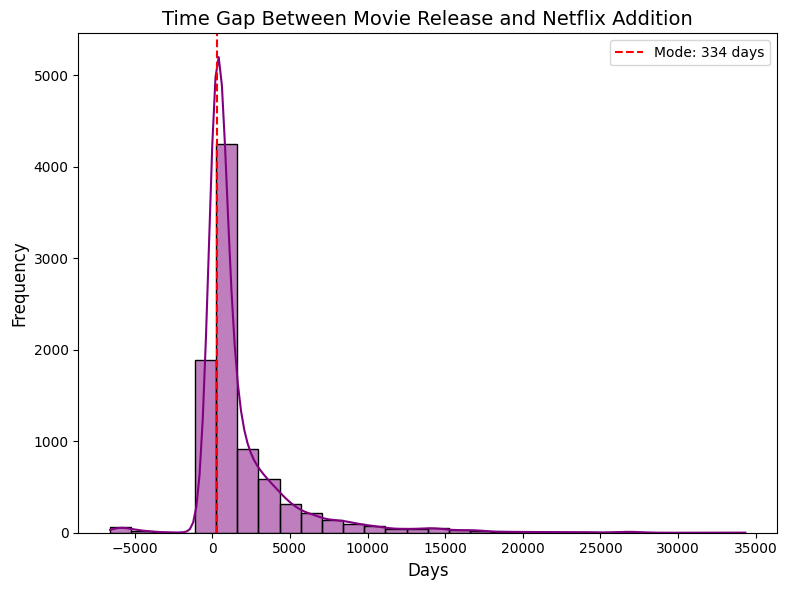

In [95]:
# Converting 'date_added' to datetime format, handling various formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')
# Drop rows with invalid dates
df = df.dropna(subset=['date_added', 'release_year'])
# Calculating the difference in days between 'date_added' and 'release_year'
df.loc[:, 'days_to_netflix'] = (df['date_added'] - df['release_year']).dt.days
# To find mode of the difference
mode_days_to_netflix = df['days_to_netflix'].mode()[0]
# Plotting the distribution with mode
plt.figure(figsize=(8, 6))
sns.histplot(df['days_to_netflix'], kde=True, color='purple', bins=30)
plt.axvline(mode_days_to_netflix, color='red', linestyle='--', label=f'Mode: {mode_days_to_netflix} days')
plt.title('Time Gap Between Movie Release and Netflix Addition', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Insights:

->Mode:Most movies and shows are added to Netflix about 11 months (334 days) after their release.

->Netflix follows a regular pattern for adding content close to this timeline.

->Some older shows and movies are added years later, likely to attract niche audiences.

->This timeline helps Netflix plan when to acquire new content.

##Missing Value & Outlier Check

In [96]:
#To find Missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


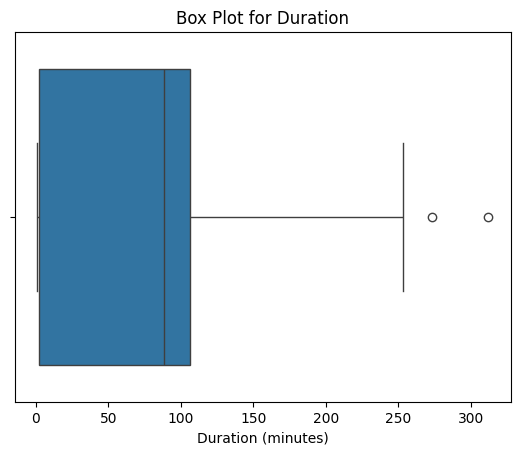

In [97]:
#Outliner check
sns.boxplot(x=df['cleaned_duration'])
plt.title('Box Plot for Duration')
plt.xlabel('Duration (minutes)')
plt.show()

Insights: From above analysis,

Graph helps to identify both common durations and unusual outliers clearly.

->Middle Line: Represents the middle value of movie durations, around 100 minutes.

->Common Range: Shows where the bulk of movie durations lie, between 75 and 125 minutes.

->Regular Range: Extend to cover most of the data. Any points outside these lines are considered unusual.

->Outliers: Indicate movies that are much longer than usual, up to 250 minutes.

##Recommendations

->Produce More Popular Genres: Focus on creating more movies and TV shows in Drama, Comedy, and Action categories as these are audience favorites.

->Launch Content During Peak Months: Release movies in January, October, and December and TV shows in September and October to match viewer demand.

->Create More Local Content: Invest in producing content in top-performing countries like the USA, India, and the UK, while exploring new regions for growth.

->Feature Top Directors and Actors: Partner with well-known directors and actors to attract larger audiences.

->Diversify Offerings: Expand into underrepresented genres like Sci-Fi, Horror, and Animation to engage new viewers.

->Add Content Quickly: Release movies on Netflix within few months of their theatrical release to maintain relevance.

->Promote International TV Shows: Highlight TV shows from diverse countries to appeal to a global audience.

->Market Strategically: Schedule marketing campaigns during the months with high content releases for maximum impact.

->Increase Documentary Content: Given their popularity, produce more documentaries to capture an engaged and curious audience.

->Engage New Talent: Scout fresh, talented directors and actors to bring unique stories and attract younger audiences.